## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [126]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [127]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [128]:
df.shape
df['landing_page'].unique()

array(['old_page', 'new_page'], dtype=object)

c. The number of unique users in the dataset.

In [129]:
df['user_id'].drop_duplicates().count()

290584

d. The proportion of users converted.

In [130]:
converted_yes = df.loc[df.converted == 1].count()
converted_total = df['converted'].count()
proportion_converted = converted_yes / converted_total
print(proportion_converted)

user_id         0.119659
timestamp       0.119659
group           0.119659
landing_page    0.119659
converted       0.119659
dtype: float64


e. The number of times the `new_page` and `treatment` don't line up.

In [131]:
#lined_up = df.loc[(df['group'] != 'treatment') & (df['landing_page'] != 'new_page')].count()
#145311
# #147202
# e_answer = 147202 - 145311
# print(e_answer)
#the answer is 3893

treatment_data = df[df.group == 'treatment']
treatment_data.head()
# filtered_data.loc[filtered_data.landing_page == 'new_page'].count()
# filtered_data.count() #147276
treatment_old_page = treatment_data.loc[treatment_data['landing_page']!='new_page'].count()

control_data = df[df.landing_page =='new_page']
control_new_page = control_data.loc[control_data['group']!= 'treatment'].count()
answer = control_new_page + treatment_old_page

answer

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [132]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [133]:
df2 = df[((df.group != 'treatment') & (df.landing_page != 'new_page')) |
        ((df.group != 'control') & (df.landing_page != 'old_page'))]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [134]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [135]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [136]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [137]:
df2 = df2.drop_duplicates('user_id',keep='last')

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [138]:
df2.loc[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [139]:
#converted = df2.loc[df2.converted == 1].count()
#convert_total = df2['converted'].count()
convert_rate = df2.loc[df2.converted == 1].count()/df2['converted'].count()
convert_rate

user_id         0.119597
timestamp       0.119597
group           0.119597
landing_page    0.119597
converted       0.119597
dtype: float64

In [140]:
#test
#df2.loc[(df2.landing_page == 'old_page') & (df2.converted == 1)].count()

test_df = df2.loc[(df2.landing_page == 'old_page') & (df2.converted == 1)]
test_df['user_id'].count()

17489

b. Given that an individual was in the `control` group, what is the probability they converted?

In [141]:
control_group = df2[df2.group == 'control']
control_group_converted = control_group.loc[control_group.converted == 1].count()
control_group_total = control_group['converted'].count()
control_group_conversion = control_group_converted/control_group_total
print(control_group_conversion)

user_id         0.120386
timestamp       0.120386
group           0.120386
landing_page    0.120386
converted       0.120386
dtype: float64


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [142]:
treatment_group = df2[df2.group == 'treatment']
treatment_group_converted = treatment_group.loc[treatment_group.converted == 1].count()
treatment_group_total = treatment_group['converted'].count()
treatment_group_conversion = treatment_group_converted / treatment_group_total
print(treatment_group_conversion) #0.118808

# testing123_df=df2.query('group == "treatment"')
# testing123_ctr = testing123_df['converted'].mean()
# testing123_ctr

user_id         0.118808
timestamp       0.118808
group           0.118808
landing_page    0.118808
converted       0.118808
dtype: float64


d. What is the probability that an individual received the new page?

In [143]:
received_new = df2.loc[df2.landing_page == 'new_page'].count()
received_total = df2['landing_page'].count()
new_page_probability = received_new / received_total
print(new_page_probability)#0.500062

user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
dtype: float64


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Your answer goes here.**

Based on the answer from the previous question, those people who are in the control group are more likely to be converted.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

P(old) = the converted rate for the old page

p(new) = the converted rate for the new page

Hypothese null = P(old) - P (new) >= 0

Hypothese alternative = P(old) - p(new) < 0

new =treatment low convertion rate

old = control



`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [144]:
#convert(probability) rate of new 

#probability of an individual converting regardless of the page they receive?
convert_rate
#0.119597


user_id         0.119597
timestamp       0.119597
group           0.119597
landing_page    0.119597
converted       0.119597
dtype: float64

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [145]:
#convert (probability) rate of old
convert_rate
#0.119597

user_id         0.119597
timestamp       0.119597
group           0.119597
landing_page    0.119597
converted       0.119597
dtype: float64

c. What is $n_{new}$?

In [146]:
#strength of the treatment group
treatment_group_conversion
strength_of_treatment = df2.loc[df2.group == 'treatment'].count()
strength_of_treatment
#145310


user_id         145310
timestamp       145310
group           145310
landing_page    145310
converted       145310
dtype: int64

d. What is $n_{old}$?

In [239]:
#stregnth of the control group
strength_of_control = df2.loc[df2.group == 'control'].count()
strength_of_control
#145274

user_id         145274
timestamp       145274
group           145274
landing_page    145274
converted       145274
intercept       145274
ab_page         145274
dtype: int64

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [148]:
n_new = 145310
Pnew_rate = 0.119597
new_page_converted = np.random.choice([1,0],size = n_new,p=[Pnew_rate,1-Pnew_rate])
new_page_converted = new_page_converted[0:145274]
new_page_converted.shape

(145274,)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [165]:
n_old = 145274 #145274
Pold_rate = 0.119597
old_page_converted = np.random.choice([1,0],size = n_old,p=[Pold_rate,1-Pold_rate])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [216]:
difference =  new_page_converted.mean() - old_page_converted.mean()
difference #0.0024505417349284797

0.0002180812535376303

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [217]:
p_diffs = []
#new = 145310
#old = 145274
for _ in range(10000):
    new_page_converted = np.random.choice([1,0],size =145310 ,p=[0.119597,1-0.119597])
    old_page_converted = np.random.choice([1,0],size =145274 ,p=[0.119597,1-0.119597])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([    6.,    42.,   405.,  1464.,  2915.,  2983.,  1623.,   494.,
           60.,     8.]),
 array([ -5.09517071e-03,  -4.08688207e-03,  -3.07859343e-03,
         -2.07030479e-03,  -1.06201615e-03,  -5.37275049e-05,
          9.54561136e-04,   1.96284978e-03,   2.97113842e-03,
          3.97942706e-03,   4.98771570e-03]),
 <a list of 10 Patch objects>)

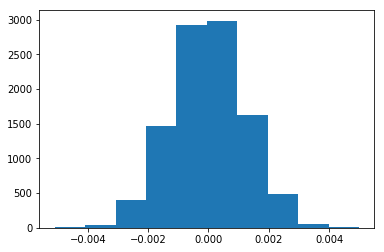

In [218]:
#convert to numpy array
p_diffs = np.array(p_diffs)

#plot distribution
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

0.90159999999999996

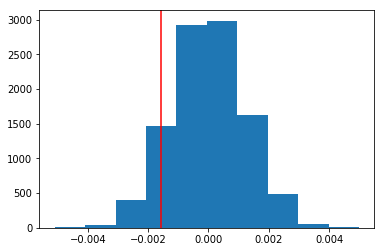

In [250]:
ob_df =df2.query('group == "treatment" and converted == 1').shape[0]/df2.query('group == "treatment"').shape[0] - df2.query('group == "control" and converted == 1').shape[0]/df2.query('group == "control"').shape[0]
plt.hist(p_diffs)
plt.axvline(x=ob_df,color='red')
(p_diffs  > ob_df).mean()

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In part j, I have computed the p_value and the value is 0.90159999999999996. When p-value is greater than 0.05, it is considered to be a large p-value which means that we fail to reject the null hypothesis. In other words, the conversion rate of the old page is indeed higher than the new page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [155]:
import statsmodels.api as sm
from scipy.stats import norm

convert_old = 0.119597
convert_new = 0.119597
n_old = 145274
n_new = 145310

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [156]:
#17489 = old,  145274 = old
z_score,p_value = sm.stats.proportions_ztest([17264,17489],[145310,145274],alternative='larger')
z_score,p_value 
#z_score = -1.3109241984234394 
#p_value = 0.18988337448195103

#Before this test began, we would have picked a significance level. 
#Let's just say it's 95%. Since this is a test for the difference, 
#it's a two-tail test so a z-score past -1.96 or 1.96 will be significant.

#norm.cdf(z_score) #0.5
#norm.ppf(1-(0.05/2)) #1.959963984540054
#example:Since the z-score of 5.288388269523054 exceeds the critical value
#of 1.959963984540054, we reject the null hypothesis that the difference 
#between the two proportions is no different from zero. Since they are 
#different, the proportion with the higher ratio of success is better 
#than the one with the lower ratio.



(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

From question m:
I got 0.0 for the z_score and my z_score did not exceed the critical value of 1.959963984540054, therefore, it means that I should not reject the null hypothesis. 
The p_value is 1.0 and it also indicates that I should not reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

The logistics regression approach should be used in this case to predict one of two possible outcomes - conversion or no conversion.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [157]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
#1 for treatment , 0 for control
#1 for new_page , 0 for old_page
df2.head()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [158]:
#df2['treatment'] = pd.get_dummies(df2['group'])['treatment']
df2['intercept'] =1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
#df2 = df2.drop('treatment',axis =1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [159]:
log_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 23 Jun 2018   Pseudo R-squ.:               8.077e-06
Time:                        11:53:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

Based on the result, the p-value associated with ab_page is 0.000. It is different from the P-value in part two is because they are testing different things. For part two, It is testing P(old) - P (new) >= 0, however, this part tests if converted or not.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It is a good idea to consider other factos to add into the regression model is because you might find something that wasn't statistically significant, significant. However, overfitting regression model might cause the regression coefficients, p-values and R-squared to be misleading.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [160]:
#u need to match based on ID\
#df_c contains the data from 'countries.csv'
#df_c['country'].unique() #'UK', 'US', 'CA'
df_c = pd.read_csv('countries.csv')
df_c.head()
df_c[['country_UK','country_US']] = pd.get_dummies(df_c.country,prefix='Country').iloc[:,1:]
df_c.loc[df_c.country == 'US']
joined = pd.merge(df2,df_c[['user_id','country','country_UK','country_US']],on='user_id',how='left')
joined.head()


,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,country_UK,country_US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [161]:
# page and country
log_mod = sm.Logit(joined['converted'],joined[['intercept','ab_page','country_UK','country_US']])
results = log_mod.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 23 Jun 2018   Pseudo R-squ.:               2.323e-05
Time:                        11:53:03   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
country_UK     0.0506      0.028      1.784      0.074      -0.005       0.106
country_US     0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by continuing on to the next module in the program.